# Avacado Project
Problem Statement:
Avocado is a fruit consumed by people heavily in the United States. 

Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold


# Importing Librabries

In [154]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import cross_val_score, train_test_split
from scipy.stats import zscore
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

Importing all the libraries for EDA datavisualisaton,prediction and finding metrics

# Loading excel dataset in dataframe

In [135]:
df=pd.read_excel(r'C:\Users\welcome\Desktop\avacado.xlsx')
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


Loading xl dataset by giving path into a variable df

In [136]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Processing the first 5 rows as most of the columns are float in nature and sex is catagorical value

In [137]:
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


Processing the first 5 rows 

In [138]:
df.shape

(18249, 14)

Checking total rows and columns

In [139]:
df.columns

Index([  'Unnamed: 0',         'Date', 'AveragePrice', 'Total Volume',
                 4046,           4225,           4770,   'Total Bags',
         'Small Bags',   'Large Bags',  'XLarge Bags',         'type',
               'year',       'region'],
      dtype='object')

Displaying column names

In [140]:
df.dtypes

Unnamed: 0               int64
Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

Most of the column are same data type that is float and date type and region is of object data type

In [141]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In tis am checking the null values to find there are null values int he data set

In [142]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


Above statistics data shows the multiple outliers mostly in XLarge Bags.There is also difference between mean and 50% value in some of the columns which used to get fix for better prediction.

Also number of rows in each columns is same and no null values
mean and 50% value of most of the column are same, also STD and mean are very close to each other
most of the column statistics data are near to 0 values
difference between 75% and max value there are outliers in some of the column. will check in the upcoming steps

# Data Visualisation

Year of avacado vs Averageprice

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

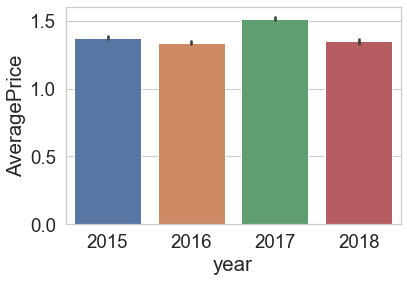

In [143]:
sns.barplot(x='year', y='AveragePrice', data=df)

The price is maximum as compared to other year and there is less difference among rest of the year.

Type of avacado vs Averageprice

<AxesSubplot:xlabel='type', ylabel='AveragePrice'>

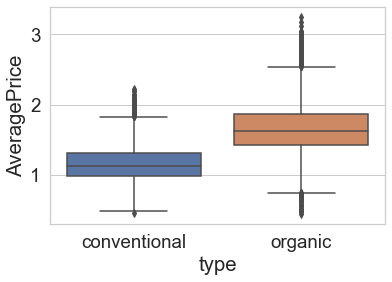

In [144]:
sns.boxplot(x='type', y='AveragePrice', data=df)

From the above boxplot we can say that the organic fruit price is more as compared to conventional fruit.

# Label Encoder

In [145]:
label=LabelEncoder()
dicts={}

label.fit(df.type.drop_duplicates())
dicts['type']=list(label.classes_)
df.type=label.transform(df.type)

Sklearn provides a very efficient tool for encoding the levels of catagorical features inot numeric values. LabelEncoder encode labels with a value between 0 and n_classes-1 where n is he number of distrinct labels. If a label repeats it assigns the same value to as assigned earlier.

# Correlation Matrix

Correlation matrix is basically a covariance matrix. A summary measure called the correlation describes the strength of the linear association. Correlation summarizes the strength and direction of the linear association between two quantitative variables

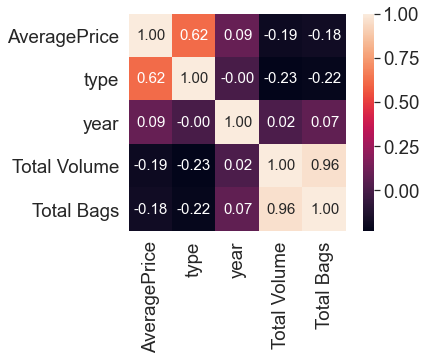

In [146]:
cols=['AveragePrice', 'type', 'year', 'Total Volume', 'Total Bags']
cm=np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.7)
hm=sns.heatmap(cm,cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':15},yticklabels=cols,xticklabels=cols)

We can see there is a strong relation between Total Bags and Total Volume ie, 0.96 and also type and AveragePrice ie, 0.62. other than that there is week relation.

Total Volume vs Small Bags Large Bags, XLarge Bags

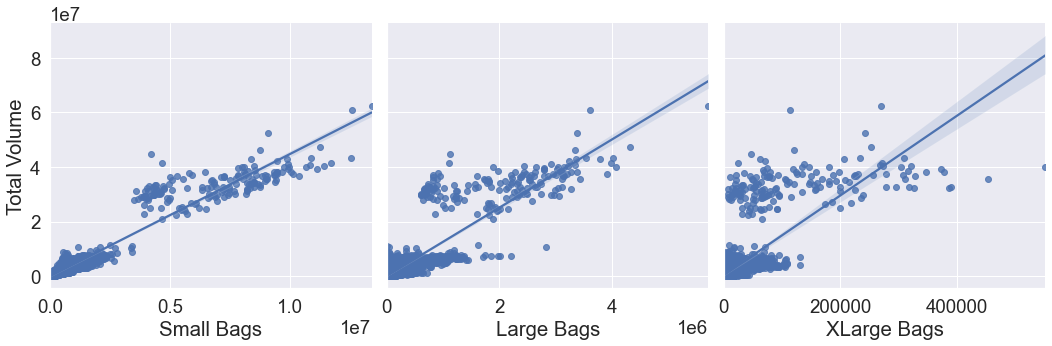

In [147]:
sns.pairplot(df,x_vars=['Small Bags', 'Large Bags','XLarge Bags'], y_vars='Total Volume', size=5, aspect=1, kind='reg')

Total Bags vsSmall Bags Large Bags, XLarge Bags

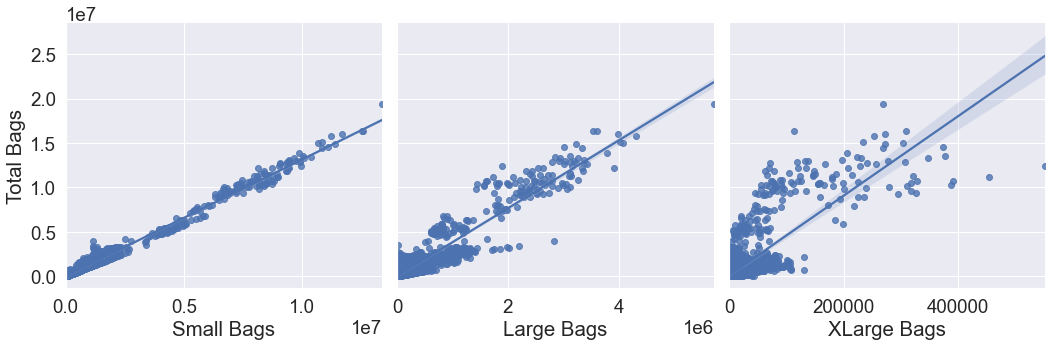

In [148]:
sns.pairplot(df,x_vars=['Small Bags', 'Large Bags','XLarge Bags'], y_vars='Total Bags', size=5, aspect=1, kind='reg')

There is a strong co-relation between Total Volume Vs Small Bags and Total Bags Vs Small Bags. We can say week co-relation between Total Volume Vs XLarge Bags and Total Bags XLarge Bags. Large Bags come in the middle.

# Region Vd Year Distribution

Text(0.5, 1.0, 'Year Average Price in Each Region')

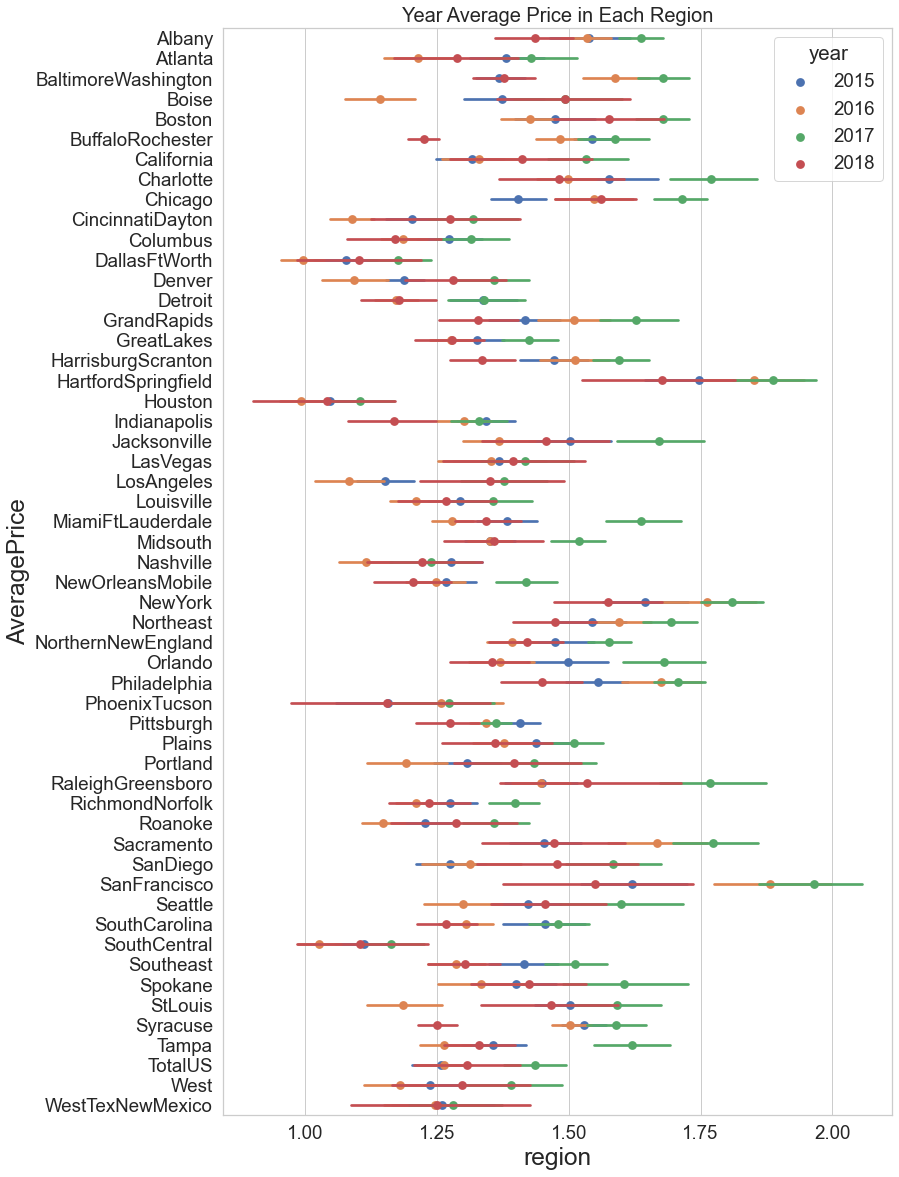

In [149]:
plt.figure(figsize=(12,20))
sns.set_style('whitegrid')
sns.pointplot(x='AveragePrice', y='region', data=df, hue='year', join=False)
plt.xticks(np.linspace(1,2,5))
plt.xlabel('region',{'fontsize':'large'})
plt.ylabel('AveragePrice', {'fontsize':'large'})
plt.title("Year Average Price in Each Region", {'fontsize':20})

From the graph we can say that in the year 2017 the HartfordSpringfield region being the maximum consumption of avacado.

# Region Vs AveragePrice distribution

Text(0.5, 1.0, 'Year Average Price in Each Region')

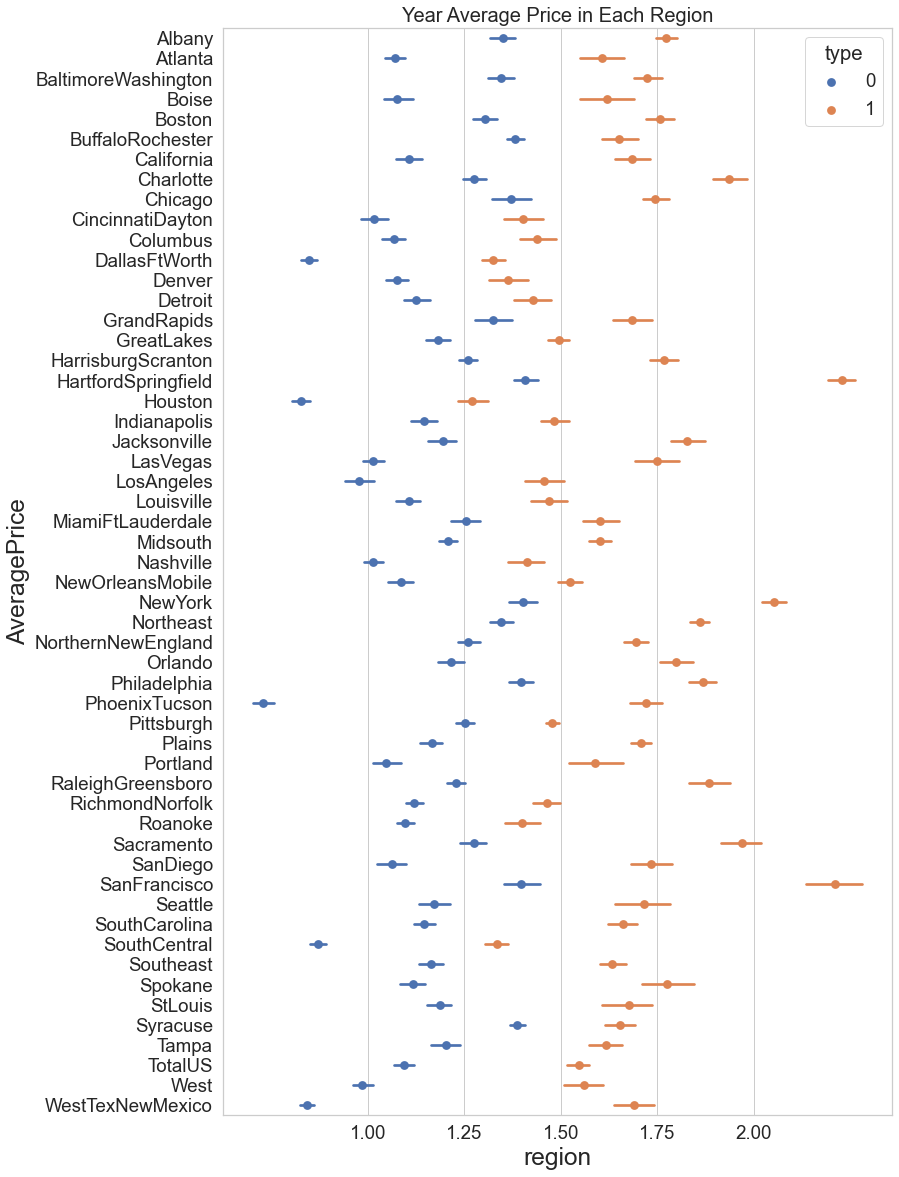

In [150]:
plt.figure(figsize=(12,20))
sns.set_style('whitegrid')
sns.pointplot(x='AveragePrice', y='region', data=df, hue='type', join=False)
plt.xticks(np.linspace(1,2,5))
plt.xlabel('region',{'fontsize':'large'})
plt.ylabel('AveragePrice', {'fontsize':'large'})
plt.title("Year Average Price in Each Region", {'fontsize':20})

From the above graph we can say that organic type avacado prices are higher in HartfordSpringfield and Sanfrancisco region. for conventional type we have an average price<1.50$

# Classifying type of avacado

Using logistic regression

In [85]:
x=df[['AveragePrice', 'Small Bags', 'Large Bags', 'XLarge Bags', ]]
y=df.type

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20, random_state=1)

print("X_Train Shape", x_train.shape)
print("Y_Train Shape", y_train.shape)

print("X_Test Shape", x_test.shape)
print("Y_Test Shape", y_test.shape)

X_Train Shape (14599, 4)
Y_Train Shape (14599,)
X_Test Shape (3650, 4)
Y_Test Shape (3650,)


In [86]:
logreg=LogisticRegression()
logreg.fit(x_train,y_train)

y_pred_train=logreg.predict(x_train)
y_pred_test=logreg.predict(x_test)

# Accuracy score

print("Accuracy score for Logistic Regression test data is:" ,accuracy_score(y_test,y_pred_test))



Accuracy score for Logistic Regression test data is: 0.8558904109589041


In [87]:
# Confusion Matrix

confusion_mat=confusion_matrix(y_test, y_pred_test)
confusion_matrix=pd.DataFrame(columns=['Predicted organic', 'Predicted Conventional'],index=['organic', 'Conventional'])
print("Confusion matrix for logistic regression model")
print(confusion_mat)


Confusion matrix for logistic regression model
[[1393  455]
 [  71 1731]]


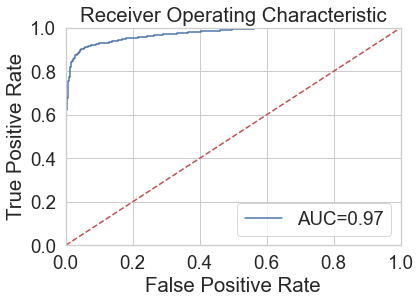

In [91]:
#AUC ROC Curve
probs=logreg.predict_proba(x_test)
preds=probs[:,1]
fpr, tpr, _ = roc_curve(y_test,preds)
roc_auc=auc(fpr,tpr)


plt.title("Receiver Operating Characteristic")
plt.plot(fpr,tpr,'b',label='AUC=%0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

# Predicting AveragePrice of avacado

In [ ]:
df.drop(['Date', 'Total Volume','Total Bags', 'region', 'year'],axis=1,inplace=True)

In [101]:
df.drop('Unnamed: 0',inplace=True,axis=1)

In [102]:
df.columns

Index(['AveragePrice',           4046,           4225,           4770,
         'Small Bags',   'Large Bags',  'XLarge Bags',         'type'],
      dtype='object')

we are calculating average price of avacado considering columns

In [103]:
scalar=StandardScaler().fit(df)
df_avacado_scalar=scalar.transform(df)
df_avacado=pd.DataFrame(df_avacado_scalar)
df_avacado.columns=['AveragePrice', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type','4046','4225','4770']
df_avacado.head()

,AveragePrice,Small Bags,Large Bags,XLarge Bags,type,4046,4225,4770
0,-0.188689,-0.230816,-0.199902,-0.212091,-0.232647,-0.222352,-0.17558,-0.999836
1,-0.139020,-0.231103,-0.208054,-0.211997,-0.231568,-0.222335,-0.17558,-0.999836
2,-1.182069,-0.231007,-0.154478,-0.211325,-0.233399,-0.222311,-0.17558,-0.999836
3,-0.809551,-0.230741,-0.185350,-0.211864,-0.236568,-0.222186,-0.17558,-0.999836
4,-0.312861,-0.230891,-0.208719,-0.211834,-0.236154,-0.221924,-0.17558,-0.999836


In [104]:
feature_cols=['Small Bags', 'Large Bags', 'XLarge Bags', 'type','4046','4225','4770']
x=df_avacado[feature_cols]

In [105]:
y=df.AveragePrice

In [106]:
def split(x,y):
    return train_test_split(x,y,test_size=0.20, random_state=1)


In [108]:
# x_train,x_test,y_train,y_test=split(x,y)
print('Train cases as below')
print('x_train shape',x_train.shape)
print('y_train shape',y_train.shape)
print('\nTrain cases as below')
print('y_test shape',y_test.shape)
print('y_test shape',y_test.shape)

Train cases as below
x_train shape (14599, 7)
y_train shape (14599,)

Train cases as below
y_test shape (3650,)
y_test shape (3650,)


# Conclusion

Columns like type of avacado, size and bags have impact on AveragePrice, lesser than RMSE value accurate the model is, when we consider Small Hass in Small Bags